# Automate the Boring Stuff with Python: Practical Programming for Total Beginners

## 第7章 模式匹配与正则表达式

### 7.2 用正则表达式查找文本模式

#### 7.2.1 创建正则表达式对象

In [1]:
import re 

In [2]:
phoneNumRegex = re.compile(r'\d\d\d-\d\d\d-\d\d\d\d')

phoneNumRegex

re.compile(r'\d\d\d-\d\d\d-\d\d\d\d', re.UNICODE)

#### 7.2.2 匹配 Regex 对象

In [3]:
phoneNumRegex = re.compile(r'\d\d\d-\d\d\d-\d\d\d\d')

mo = phoneNumRegex.search("My numbver is 415-555-4242.")

mo.group()

'415-555-4242'

### 7.3 用正则表达式匹配更多模式

#### 7.3.1 利用括号

In [4]:
phoneNumRegex = re.compile(r'(\d\d\d)-(\d\d\d-\d\d\d\d)')

mo = phoneNumRegex.search("My number is 415-555-4242")

mo.group(0)

'415-555-4242'

In [5]:
mo.group(1)

'415'

In [6]:
mo.group(2)

'555-4242'

In [7]:
mo.group()

'415-555-4242'

In [8]:
# 如果想要一次就获取所有的分组， 请使用 groups()方法，

mo.groups()


('415', '555-4242')

In [10]:
type(mo.groups())

tuple

In [9]:
areaCode, mainNumber = mo.groups()
areaCode

'415'

In [11]:
mainNumber

'555-4242'

In [12]:
"""
但是如果你需要在文本中匹配括号， 怎么
办？例如， 你要匹配的电话号码， 可能将区号放在一对括号中。在这种情况下，
就需要用倒斜杠对(和)进行字符转义。
"""
# \(\d\d\d\))


phoneNumRegex = re.compile(r'(\(\d\d\d\)) (\d\d\d-\d\d\d\d)')
mo = phoneNumRegex.search("My number is (415) 555-4242")

mo.groups()

('(415)', '555-4242')

In [13]:
mo.group(1)

'(415)'

In [14]:
mo.group(2)

'555-4242'

In [15]:
mo.group(0)

'(415) 555-4242'

#### 7.3.2 用管道匹配多个分组

In [16]:
heroRegex = re.compile(r'Batman|Tina Fey')

mo1 = heroRegex.search('Batman and Tina Fey.')

mo1.groups()

()

In [18]:
mo1.group()

'Batman'

In [19]:
mo2 = heroRegex.search('Tina Fey and Batman')
mo2.group()

'Tina Fey'

In [20]:
batRegex = re.compile(r'Bat(man|mobile|copter|bat)')

mo = batRegex.search("Batmobile lost a wheel")

mo.group()

'Batmobile'

In [21]:
mo.group(0)

'Batmobile'

In [22]:
mo.group(1)

'mobile'

#### 7.3.3 用问号 实现可选匹配

In [23]:
#  wo 将出现零次或一次。
batRegex = re.compile(r'Bat(wo)?man')
mo1 = batRegex.search('The Adventure of Batman')

mo1.group()

'Batman'

In [24]:
mo2 = batRegex.search('The adventure of Batwoman')
mo2.group()

'Batwoman'

In [25]:
phoneNumRegex = re.compile(r'(\d\d\d-)?\d\d\d-\d\d\d\d')
mo1 = phoneNumRegex.search('My number is 415-555-4242')
mo1.group()

'415-555-4242'

In [26]:
mo2 = phoneNumRegex.search('My number is 555-4242.')
mo2.group()

'555-4242'

#### 7.3.4 用星号匹配零次或者多次

In [27]:
batRegex = re.compile(r'Bat(wo)*man')

mo1 = batRegex.search('The Adventures of Batman')
mo1.group()

'Batman'

In [28]:
mo2 = batRegex.search("The Adventures of Batwoman")
mo2.group()

'Batwoman'

In [29]:
mo3 = batRegex.search("The Adventures of Batwowowoman.")
mo3.group()

'Batwowowoman'

#### 7.3.5 用加号匹配一次或者多次

In [30]:
batRegex = re.compile(r'Bat(wo)+man')
mo1 = batRegex.search("The Adventures of Batwoman")

mo1.group()

'Batwoman'

In [31]:
mo2 = batRegex.search("The Adventures of Batwowowoman")
mo2.group()

'Batwowowoman'

In [33]:
mo3 = batRegex.search('The Adventures of Batman')
mo3.group()

AttributeError: 'NoneType' object has no attribute 'group'

In [34]:
mo3 == None 

True

#### 用花括号匹配特定次数

- (Ha){3} == (Ha)(Ha)(Ha)

- (Ha){3,5} == 
((Ha)(Ha)(Ha))|((Ha)(Ha)(Ha)(Ha))|((Ha)(Ha)(Ha)(Ha)(Ha))

In [35]:
haRegex = re.compile(r'(Ha){3}')
mo1 = haRegex.search('HaHaHa')
mo1.group()

'HaHaHa'

In [36]:
mo2 = haRegex.search('Ha')
mo2 == None 

True

### 7.4 贪心和非贪心匹配

In [37]:
"""
Python 的正则表达式默认是“贪心” 的， 这表示在有二义的情况下，它们会尽
可能匹配最长的字符串。花括号的“非贪心” 版本匹配尽可能最短的字符串，即在
结束的花括号后跟着一个问号。
"""

greedyHaRegex = re.compile(r'(Ha){3,5}')

mo1 = greedyHaRegex.search("HaHaHaHaHa")
mo1.group()

'HaHaHaHaHa'

In [38]:
non_greedyHaRegex = re.compile(r'(Ha){3,5}?')

mo2 = non_greedyHaRegex.search("HaHaHaHaHa")
mo2.group()

'HaHaHa'

### 7.5 findall() 方法

In [39]:
"""
search()将返回一个Match
对象， 包含被查找字符串中的“第一次” 匹配的文本，
而 findall()方法将返回一组
字符串， 包含被查找字符串中的所有匹配。
"""

phoneNumRegex = re.compile(r'\d\d\d-\d\d\d-\d\d\d\d')
mo = phoneNumRegex.search('Cell: 415-555-9999 Work: 212-555-0000')
mo.group()

'415-555-9999'

In [40]:
"""
findall()不是返回一个 Match 对象， 而是返回一个字符串列表， 只要
在正则表达式中没有分组。列表中的每个字符串都是一段被查找的文本，
它匹配该正则表达式。
"""

phoneNumRegex = re.compile(r'\d\d\d-\d\d\d-\d\d\d\d')
phoneNumRegex.findall('Cell: 415-555-9999 Work: 212-555-0000')

['415-555-9999', '212-555-0000']

In [41]:
# 如果在正则表达式中有分组， 那么 findall 将返回元组的列表。

phoneNumRegex = re.compile(r'(\d\d\d)-(\d\d\d)-(\d\d\d\d)')
phoneNumRegex.findall('Cell: 415-655-9999 Work: 212-555-0000')

[('415', '655', '9999'), ('212', '555', '0000')]

### 7.6 字符分类

In [42]:
xmasRegex = re.compile(r'\d+\s\w+')
xmasRegex.findall("12 drummers, 11 pipers, 10 lords, 9 ladies, 8 maids, 7 swans")


['12 drummers', '11 pipers', '10 lords', '9 ladies', '8 maids', '7 swans']

### 7.7 创建自己的字符分类

In [43]:
vowelRegex = re.compile(r'[aeiouAEIOU]')

vowelRegex.findall("RoboCop eats baby food. BABY FOOD.")

['o', 'o', 'o', 'e', 'a', 'a', 'o', 'o', 'A', 'O', 'O']

In [46]:
mo = vowelRegex.search("RoboCop eats baby food. BABY FOOD.")
mo.group()

'o'

In [47]:
"""
通过在字符分类的左方括号后加上一个插入字符（^）， 就可以得到“非字符类”。
非字符类将匹配不在这个字符类中的所有字符。
"""

consonantRegex = re.compile(r'[^aeiouAEIOU]')
consonantRegex.findall("RoboCop eats baby food. BABY FOOD.")

['R',
 'b',
 'C',
 'p',
 ' ',
 't',
 's',
 ' ',
 'b',
 'b',
 'y',
 ' ',
 'f',
 'd',
 '.',
 ' ',
 'B',
 'B',
 'Y',
 ' ',
 'F',
 'D',
 '.']

### 7.8 插入字符和美元字符

In [48]:
beginsWithHello = re.compile(r'^Hello')
beginsWithHello.search("Hello world!")

beginsWithHello.search("He said hello.") == None 

True

In [49]:
endsWithNumber = re.compile(r'\d$')
endsWithNumber.search('Your number is 42')

<re.Match object; span=(16, 17), match='2'>

In [50]:
endsWithNumber.search("Your number is forty two.") == None 

True

In [51]:
# 正则表达式 r'^\d+$'匹配从开始到结束都是数字的字符串

wholeStringIsNum = re.compile(r'\d+$')
wholeStringIsNum.search('1234567890')

<re.Match object; span=(0, 10), match='1234567890'>

In [52]:
wholeStringIsNum.search('123456xefew809') == None 

False

In [53]:
wholeStringIsNum.search('12  256465') == None 

False

### 7.9 通配字符

In [54]:
#  .（句点）字符称为“通配符”。它匹配除了换行之外的所有字符

atRegex = re.compile(r'.at')
atRegex.findall("The cat in the hat sat on the flat mat")

['cat', 'hat', 'sat', 'lat', 'mat']

#### 7.9.1 用点-星匹配所有字符

In [55]:
# 。可以用点-星（ .*）表示“任意文本”

nameRegex = re.compile(r'First Name: (.*) Last Name: (.*)')

mo = nameRegex.search('First Name: Al Last Name: Sweigart')
mo.groups()

('Al', 'Sweigart')

In [56]:
mo.group(1)

'Al'

In [57]:
mo.group(2)

'Sweigart'

In [58]:
mo.group()

'First Name: Al Last Name: Sweigart'

In [59]:
"""
点-星使用“贪心” 模式：它总是匹配尽可能多的文本。
要用“非贪心” 模式匹配所有文本， 就使用点-星和问号
"""

non_greedyRegex = re.compile(r'<.*?>')

mo = non_greedyRegex.search('<To serve man> for dinner.')
mo.group()

'<To serve man>'

In [60]:
greedyRegex = re.compile(r'<.*>')

mo = greedyRegex.search('<To serve man> for dinner.')
mo.group()

'<To serve man>'

#### 7.9.2 用句点字符匹配换行

In [ ]:
"""
点-星将匹配除换行外的所有字符。通过传入 re.DOTALL 作为 re.compile()的第
二个参数， 可以让句点字符匹配所有字符， 包括换行字符
"""

In [61]:
noNewlineRegex = re.compile('.*')
mo = noNewlineRegex.search('Serve the public trust.\nProtext the innocent.\nUphold the law')
mo.group()

'Serve the public trust.'

In [62]:
newlineRegex = re.compile('.*', re.DOTALL)
mo = newlineRegex.search('Serve the public trust.\nProtext the innocent.\nUphold the law')
mo.group()

'Serve the public trust.\nProtext the innocent.\nUphold the law'

### 7.10 正则表达式符号复习

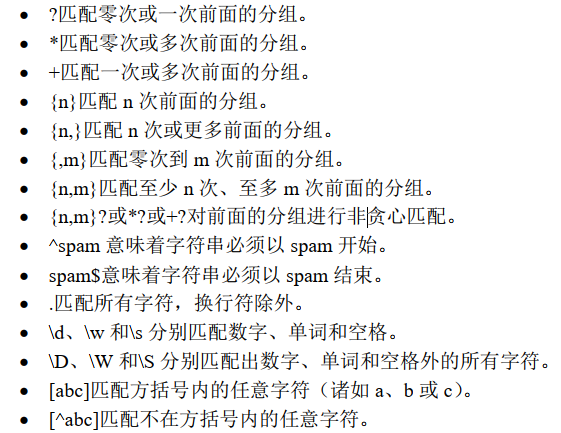